In [9]:
"""
Title: energy function illustration plotting
Author: Yifei Dong
Date: 14/07/2023
Description: This notebook is for plotting the illustration of a simple energy function in terms of 
a 2D C-space as well as the escape energy.
"""

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import tikzplotlib

In [2]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    
    return np.exp(-z/(2*(1-rho**2))) / denom

In [3]:
num_contours = 8
offset = 0
width = 3.3
lw = (0,0,0,0,0,width,0,0)
lw1 = (0,0,0,0,0,1.5,0,0)
E_level = 1.8
fs = 28

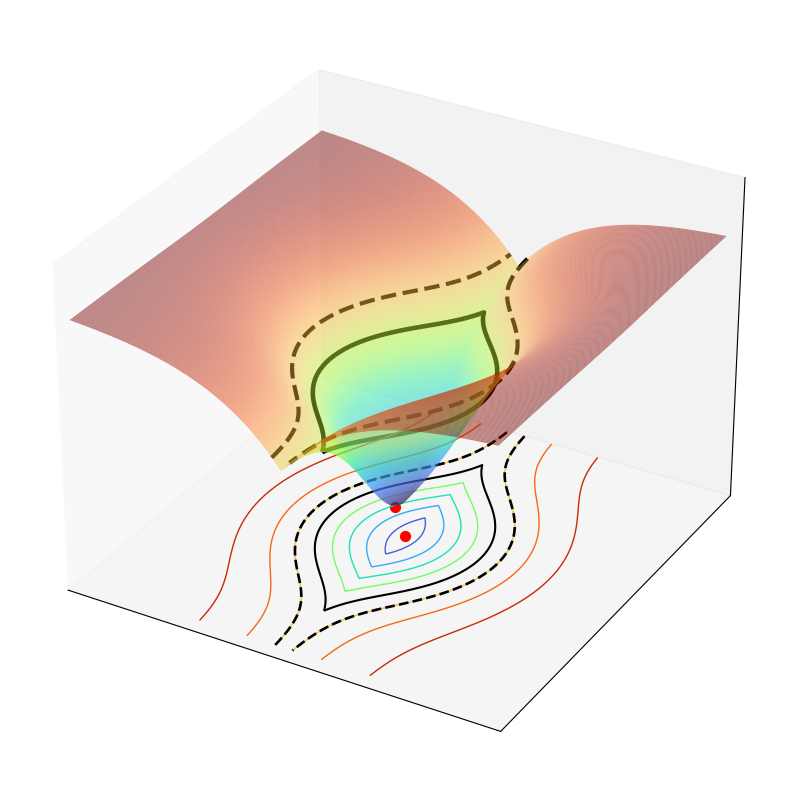

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z3 = -1/np.exp(np.abs(X))
Z = 10.0 * (-Z1) + 1 * Z3 + 3.0

ax.plot_surface(X, Y, Z, cmap=cm.turbo, lw=0.5, rstride=1, cstride=1, alpha=0.5) # surface
ax.contour(X, Y, Z, num_contours, linewidths=1, cmap=cm.turbo, linestyles="solid", offset=offset) # bottom contour
contour = ax.contour(X, Y, Z, num_contours, linewidths=lw, colors="k", linestyles="solid") # black level set
ax.contour(X, Y, Z, num_contours, linewidths=lw1, colors="k", linestyles="solid", offset=offset) # bottom contour, black
contour = ax.contour(X, Y, Z, num_contours, linewidths=(0,0,0,0,0,0,3,0), colors="k", linestyles="dashed") # black level set - dashed
ax.contour(X, Y, Z, num_contours, linewidths=(0,0,0,0,0,0,1.9,0), colors="k", linestyles="dashed", offset=offset) # bottom contour, black - dashed
# ax.plot(x+100, y+100, c='black', label=r'$E(\mathbf{x})=$'+str(E_level), linewidth=width) # fake plot to retrieve legend
ax.scatter(-0.07,-.15,0.39, c='red', s=200, marker='.', label=r'$E({\mathbf{x}}_{init})$') # E(eps_s)
ax.scatter(0,-0,offset, c='red', s=200, marker='.', label=r'${\mathbf{x}}_{init}$') # eps_s

ax.view_init(30, -60)
# plt.legend(bbox_to_anchor=(0.45, 0.9), fontsize=fs)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axes.set_xlim3d(left=-3, right=3)
ax.axes.set_ylim3d(bottom=-3, top=3)
ax.axes.set_zlim3d(bottom=offset, top=3.5)
# ax.text(0,-4, 0, r'${x}_1$', fontsize=fs)
# ax.text(3.5, -1, 0, r'${x}_2$', fontsize=fs)
# ax.text(2, 3, 1.4, r'$E(\mathbf{x})$', fontsize=fs)
# plt.title('Energy function of the C-space')
plt.savefig("illu-3d.png", dpi=300)
# tikzplotlib.save("ICRAfigure3.tex")
plt.show()

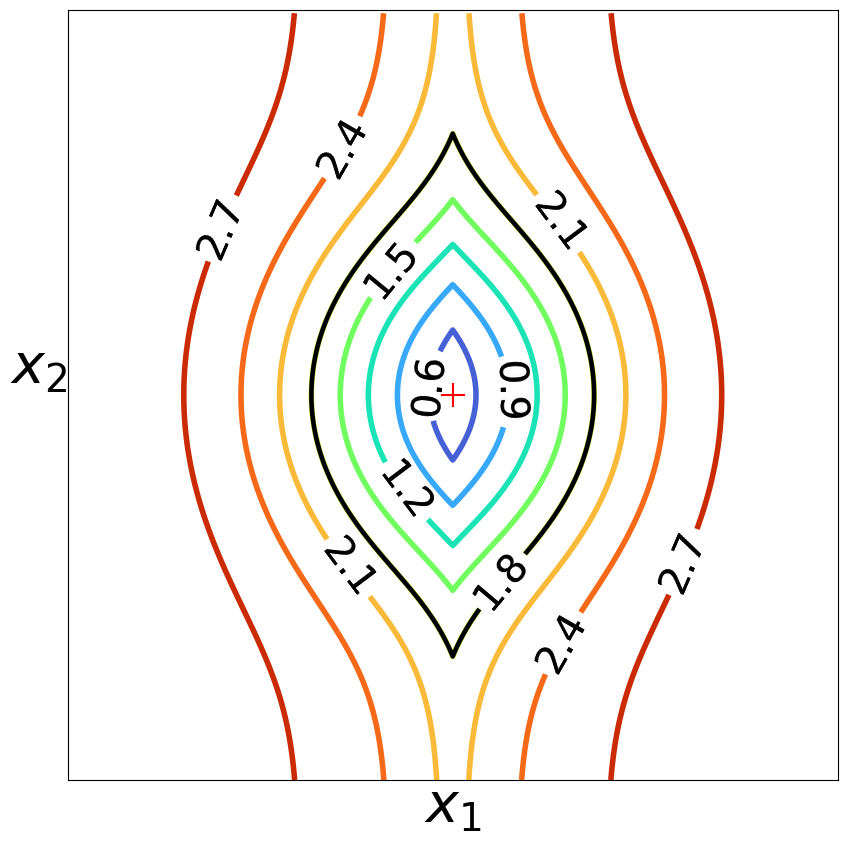

In [16]:
plt.figure(figsize=(10, 10))
CS = plt.contour(X, Y, Z, num_contours, cmap=cm.turbo, linewidths=4, )
CS1 = plt.contour(X, Y, Z, num_contours, linewidths=lw, colors="k", linestyles="solid")
plt.clabel(CS1, inline=1, fontsize=fs, colors="k",)
plt.clabel(CS, inline=1, fontsize=fs, colors="k",)
plt.scatter(0,-0, c='red', s=300, marker='+', label=r'${\mathbf{x}}_{init}$') # eps_s

# plt.legend(loc='upper left', fontsize=fs+12)
plt.axis('equal')
plt.axis('square')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$x_1$', rotation=0, labelpad=0, fontsize=fs+12)
plt.ylabel(r'$x_2$', rotation=0, labelpad=21, fontsize=fs+12)
# plt.title('Contour plot of the energy function')
plt.savefig("illu-2dcontour.png", dpi=300)
